# Welcome to the Initial Exercise book of this Stock Trader's Almanac Financial Data Analysis Series.

<p>In this notebook, we will feature a number of data cleaning and wrangling operations that are typical in the fields of Data Science/Analysis. Most of these operations will be familiar to the average data science enthusiast, with the emphasis on financial data being the primary differentiator. Concepts and activities explored will include importing and cleaning of financial data, filtering (or data slicing) operations, data display visualization operations, and so on.<b></p>

<p>As an added benefit, emphasis will be placed on examining real world problems and applications. We hope you find the series both engaging and illuminating.</p> 




# EXERCISE 1: Examining the accuracy of The Stock Trader's Almanac's "January Barometer"


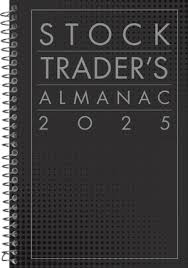<br>
<br>
Authors:<br>
Jeffrey A. Hirsch & Christopher Mistal<br>

## Exercise Background:

<p>One of the Stock Trader's Almanac's Favourite indicators is the well-known "January Barometer." An excerpt from the 2025 version can be found below:<br></p>

<p>"Devised by Yale Hirsch in 1972, our January Barometer states that as the S&P 500 goes in January, so goes the year. The indicator has registered 12 major errors since 1950 for an 83.8% accuracy ratio."<br></p>


# Exercise 2: Analyzing Tom Lee's Assertions about the profitability of going long equities whenever the VIX > 50. (April 17-2025)

## Brief Introduction to Tom Lee:
<br>
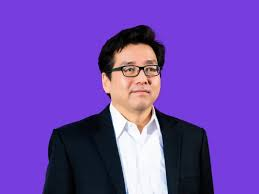
<p>Thomas J. Lee, CFA <br>   
Co-Founder, Head of Research Fundstrat Global Advisors<br>   
CIO and Portfolio Manager, Frundstrat Capital<br></p>   


<p>                                          
Thomas Lee is a Managing Partner and the Head of Research at Fundstrat Global Advisors. He is an accomplished Wall Street strategist with over 25 years of experience in equity research and has been top-ranked by Institutional Investor every year since 1998. He is regularly featured on CNBC as a market analyst and commentator. Prior to co-founding Fundstrat, he served as J.P. Morgan’s Chief Equity Strategist from 2007 to 2014, and previously as Managing Director at Salomon Smith Barney. His areas of expertise include Market Strategy, Small/Mid-Cap Strategy, and Telecom Services. Mr. Lee received his BSE from the Wharton School at the University of Pennsylvania with concentrations in Finance and Accounting. He is a CFA charterholder and is an active member of NYSSA and the NY Economic Club.</p>
    
## Exercise Background:

<p>On April 17, 2025, Tom lee released a brief market recap on the Fundstrat YouTube Channel. In it he quickly reviewed his correct call of the V-shaped US market recovery following the Trump Administration's "Liberation Day" (April 2nd, 2025) Tariff anouncements. The S&P had fallen over 20% since its highs of aproximately 6155 points on February 19<sup>th</sup> of the same year. It made its bottom on April 07<sup>th</sup>, 2025.  Similarly the NASDAQ had fallen about 25% over the same period <br></p>

<p>For our purposes, we will be examining Tom's assetion that the April 07-10<sup>th</sup> VIX highs of 60.13, 57.52, 57.96, & 54.87 represented a profitable buying opportunity in US equities. More to the point, we will be testing "...[the] old [Wall Street] adage, you buy stocks when the VIX goes above 50, and good things will start to happen when it drops below 30," as explained in the video. For the sake of simplicity, we will be using the S&P 500 as a proxy for US equitities in our examinations.<br></p> 

<p>A link to the original Youtube video is provided below<b></p>

[Click here to watch the video on YouTube](https://youtu.be/C15d8f3sUMw?si=h5LDmJzHssZiVFJV)

Below is a screenshot 04:15 into the video where Tom starts examining the adage that when the VIX is over 50, its usually a good time to go long.<br> 

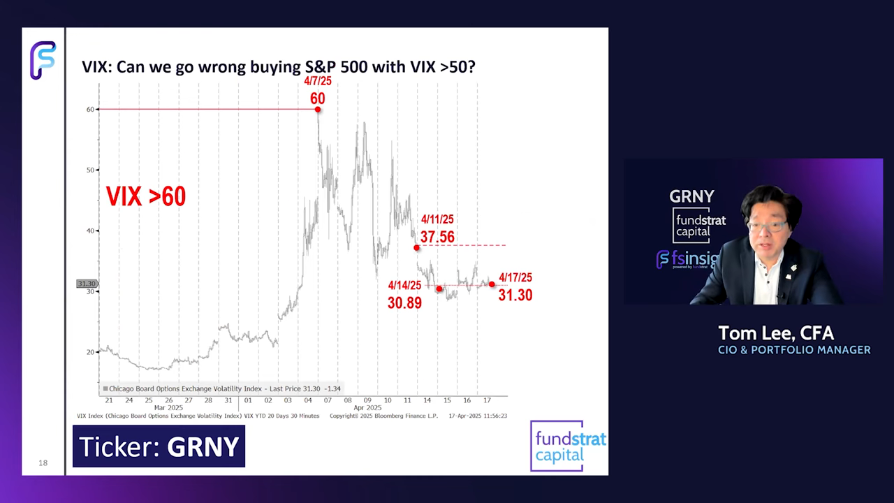<br>

[Click here to watch the video at 04:15, where Tom starts examining the VIX>50 Adage](https://youtu.be/C15d8f3sUMw?si=K6hKHHukR-rspHj1&t=240)

## Exercise Goals:

1. Run a python query covering the last 10 years for every instance the VIX crossed a daily High above 50
2. Then create a dataframe examining the 5-day, 10-day, 30-day, 60-day, & 90-day returns if we had gone long the S&P after that instance
3. Display this data graphically in an easily understandable format.
   







## STEP 1: Writing the Initial Code that filters for VIX>50 Values over the Past 10yrs

As stated in the title, we begin by downloading VIX index daily data for the past 10yrs from yfinance. We then filter this downloaded data for days when the VIX reached a high of over 50 during the trading day. 


In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# 1. Define the ticker symbol for VIX
ticker = "^VIX"

# 2. Calculate the date 10 years ago from today
end_date = datetime.today()
start_date = end_date - timedelta(days=10*365)

# 3. Download historical data for VIX
#Note that the yf.download() aduto_adjust parameter 
vix_data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)
print('\n', vix_data.head)

# 4. The columns in yfinance downloaded data are often multi-indexed. In our situation, the column names have a level 1 index which is High, Low, close, etc, and then a level 2 index which is the
#  the ticker name. As such, each column name is denoted by a tuple, e.g. ('High', '^VIX'), which is a (Price, Ticker) naming convention.

column_names_index = vix_data.columns
print('\n', column_names_index)
print('\n', vix_data.head)

# 5. Filter for days where the closing price was above 50. Note how we adjust the column name when slicing the dataframe to reflect the multi-Index naming convention described in Section 4.
vix_above_50 = vix_data[vix_data[('High', '^VIX')] > 50]

# 6. Print The filtered DataFrame
print(vix_above_50.High.describe())
print('\n', vix_above_50)

# Optionally save the filtered data to a CSV file
# vix_above_50.to_csv("vix_above_50.csv")


[*********************100%***********************]  1 of 1 completed


 <bound method NDFrame.head of Price       Adj Close      Close       High        Low       Open Volume
Ticker           ^VIX       ^VIX       ^VIX       ^VIX       ^VIX   ^VIX
Date                                                                    
2015-09-01  31.400000  31.400000  33.820000  29.910000  31.910000      0
2015-09-02  26.090000  26.090000  30.450001  24.770000  29.139999      0
2015-09-03  25.610001  25.610001  26.309999  23.450001  25.209999      0
2015-09-04  27.799999  27.799999  29.469999  25.680000  27.430000      0
2015-09-08  24.900000  24.900000  26.250000  24.129999  25.049999      0
...               ...        ...        ...        ...        ...    ...
2025-08-22  14.220000  14.220000  16.830000  14.210000  16.809999      0
2025-08-25  14.790000  14.790000  15.190000  14.240000  15.050000      0
2025-08-26  14.620000  14.620000  15.750000  14.620000  15.750000      0
2025-08-27  14.850000  14.850000  15.230000  14.660000  14.660000      0
2025-08-28  14.4300

## STEP 2:
Now we continue our work by creating a new, empty DataFrame with the specified index and columns to store the S&P 500 future values.

In [10]:
# Now we continue our work by creating a new, empty DataFrame with the specified index and columns to store 
# the S&P 500 future values.

sp500_future_values = pd.DataFrame(index=event_dates, columns=[
    'S&P 500 Close on Event Date',
    'S&P 500 Close after 5 days',
    'S&P 500 Close after 10 days',
    'S&P 500 Close after 30 days',
    'S&P 500 Close after 60 days',
    'S&P 500 Close after 90 days'
])
display(sp500_future_values.head())

,S&P 500 Close on Event Date,S&P 500 Close after 5 days,S&P 500 Close after 10 days,S&P 500 Close after 30 days,S&P 500 Close after 60 days,S&P 500 Close after 90 days
Date,,,,,,
2018-02-06,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-09,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-10,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-11,NaN,NaN,NaN,NaN,NaN,NaN


## STEP 3:
Now we continue by creating a table/dataframe with S&P returns 5,10,30,60,& 90 days after each of the dates in vix_above_50.to_csv

#### NOTE: introduction of the display() function
we switch to using display() instead of print() since display() is designed for Richer data visualization in notebooks.
display() can display dataframes as tables, images as actual images, plots as interactive charts, and other objects in formats optimized for the notebook environment.

In [3]:
from datetime import timedelta

#1. Create a table with each of the dates in vix_above_50 as the row index. 
event_dates = vix_above_50.index
display(event_dates)

# Define the ticker symbol for S&P 500
sp500_ticker = "^GSPC"

# Determine the earliest and latest dates from event_dates
earliest_date = event_dates.min()
latest_date = event_dates.max()

# Calculate the end date for downloading S&P 500 data
end_date_sp500 = latest_date + timedelta(days=90)

# Download the historical data for S&P 500
sp500_data = yf.download(sp500_ticker, start=earliest_date, end=end_date_sp500, auto_adjust=False)

# Display the first few rows of the sp500_data DataFrame

display(sp500_data.head())


DatetimeIndex(['2018-02-06', '2020-03-06', '2020-03-09', '2020-03-10',
               '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-16',
               '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
               '2020-03-27', '2020-03-30', '2020-03-31', '2020-04-01',
               '2020-04-02', '2020-04-03', '2024-08-05', '2025-04-07',
               '2025-04-08', '2025-04-09', '2025-04-10'],
              dtype='datetime64[ns]', name='Date', freq=None)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
2018-02-06,2695.139893,2695.139893,2701.040039,2593.070068,2614.780029,5917350000
2018-02-07,2681.659912,2681.659912,2727.669922,2681.330078,2690.949951,4646300000
2018-02-08,2581.000000,2581.000000,2685.270020,2580.560059,2685.010010,5333840000
2018-02-09,2619.550049,2619.550049,2638.669922,2532.689941,2601.780029,5690110000
2018-02-12,2656.000000,2656.000000,2672.610107,2622.449951,2636.750000,4069220000


'\nNote: we switch to using display() instead of print() since display() is designed for Richer data visualization in notebooks.\ndisplay() can display dataframes as tables, images as actual images, plots as interactive charts, and other objects \nin formats optimized for the notebook environment.\n'

## STEP 4: Slicing our S&P 500 data for values on our event dates
Next, we continue by slicing our sp500_data dataframe for their corresponding even_dates data values. We then populate our sp500_future_values dataframe with the S&P 500 value for both the original event date value, and then the values 5, 10, 30, & 90 days later. 

(i.e. For each date in the vix_above_50 index, we're going to find the S&P 500 closing value on that date and the closing values 5, 10, 30, 60, and 90 days later.) 

#### NOTE:
The previous code failed because the get_loc method of DatetimeIndex did not support the method argument in this version of pandas. We needed to find the closest date in the index manually or use a different approach. In the end, we used .asof() in lines 10-11 to find the closest date less than or equal to the target date.

In [5]:
for event_date in event_dates:
    # Get S&P 500 close on event date
    event_date_sp500_close = sp500_data.loc[sp500_data.index == event_date, ('Close', '^GSPC')]
    if not event_date_sp500_close.empty:
        sp500_future_values.loc[event_date, 'S&P 500 Close on Event Date'] = event_date_sp500_close.iloc[0]
   
    # Calculate and get future S&P 500 close prices
    for days in [5, 10, 30, 60, 90]:
        future_date = event_date + timedelta(days=days)
        # Find the closest date in sp500_data index using asof
        closest_future_date = sp500_data.index.asof(future_date)
        if closest_future_date:
            future_sp500_close = sp500_data.loc[closest_future_date, ('Close', '^GSPC')]
            sp500_future_values.loc[event_date, f'S&P 500 Close after {days} days'] = future_sp500_close

display(sp500_future_values.head())

,S&P 500 Close on Event Date,S&P 500 Close after 5 days,S&P 500 Close after 10 days,S&P 500 Close after 30 days,S&P 500 Close after 60 days,S&P 500 Close after 90 days
Date,,,,,,
2018-02-06,2695.139893,2619.550049,2732.219971,2738.969971,2604.469971,2672.629883
2020-03-06,2972.370117,2741.379883,2386.129883,2488.649902,2868.439941,3112.350098
2020-03-09,2746.560059,2711.02002,2409.389893,2749.97998,2929.800049,3193.929932
2020-03-10,2882.22998,2711.02002,2304.919922,2789.820068,2929.800049,3232.389893
2020-03-11,2741.379883,2386.129883,2304.919922,2789.820068,2929.800049,3207.179932


## STEP 5: Converting our sp500_future_values dataframe to display Percentage Values

Next we modify our sp500_future_values so we can see the values in the 	"S&P 500 Close after" 5 days, 10 days, 30 days, & 90 days columns as percentage changes.

#### NOTE: Remember to convert the dataframe to numerical data with .to_numeric()
We must convert the dataframe values into numeric data before displaying, otherwise we won't get statistical summaries such as mean and std. dev when we run the .describe() method on them. 

In [7]:
# Calculate percentage change for each future date
sp500_percentage_change = pd.DataFrame(index=sp500_future_values.index)

for days in [5, 10, 30, 60, 90]:
    col_name = f'S&P 500 Close after {days} days'
    percentage_change_col_name = f'Percentage Change after {days} days'
    # Convert columns to numeric before calculating percentage change, if you d
    sp500_future_values[col_name] = pd.to_numeric(sp500_future_values[col_name])
    sp500_future_values['S&P 500 Close on Event Date'] = pd.to_numeric(sp500_future_values['S&P 500 Close on Event Date'])

    sp500_percentage_change[percentage_change_col_name] = (
        (sp500_future_values[col_name] - sp500_future_values['S&P 500 Close on Event Date']) / sp500_future_values['S&P 500 Close on Event Date']
    ) * 100

# Display the percentage changes
display(sp500_percentage_change)
print(sp500_percentage_change.info())
print(sp500_percentage_change.describe())

,Percentage Change after 5 days,Percentage Change after 10 days,Percentage Change after 30 days,Percentage Change after 60 days,Percentage Change after 90 days
Date,,,,,
2018-02-06,-2.804672,1.375813,1.626264,-3.364201,-0.835207
2020-03-06,-7.771247,-19.722989,-16.273889,-3.496542,4.709372
2020-03-09,-1.293984,-12.276089,0.124517,6.671618,16.288370
2020-03-10,-5.940191,-20.029979,-3.206195,1.650461,12.148923
2020-03-11,-12.958802,-15.921178,1.767000,6.873187,16.991445
2020-03-12,1.957158,-7.083655,12.463727,18.122342,28.601491
2020-03-13,-11.542516,-17.470181,2.906657,5.868643,10.736921
2020-03-16,-3.403417,10.223257,16.647469,20.014420,27.457859
2020-03-17,-8.867267,0.485532,10.689593,13.225974,21.247916


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27 entries, 2018-02-06 to 2025-04-10
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Percentage Change after 5 days   27 non-null     float64
 1   Percentage Change after 10 days  27 non-null     float64
 2   Percentage Change after 30 days  27 non-null     float64
 3   Percentage Change after 60 days  27 non-null     float64
 4   Percentage Change after 90 days  27 non-null     float64
dtypes: float64(5)
memory usage: 2.3 KB
None
       Percentage Change after 5 days  Percentage Change after 10 days  \
count                       27.000000                        27.000000   
mean                         0.052066                         0.828898   
std                          6.794165                        10.249168   
min                        -12.958802                       -20.029979   
25%                         -

## STEP 6: Graphing and Summarizing our Findings

#### NOTE: Used .T attribute
1. We had to use the description.T attribute to transpose the sp500_percentage_change.describe() output into a table format for graphing.
2. Background colors of the two graphs we changed to a light gray color for easier viewing.  

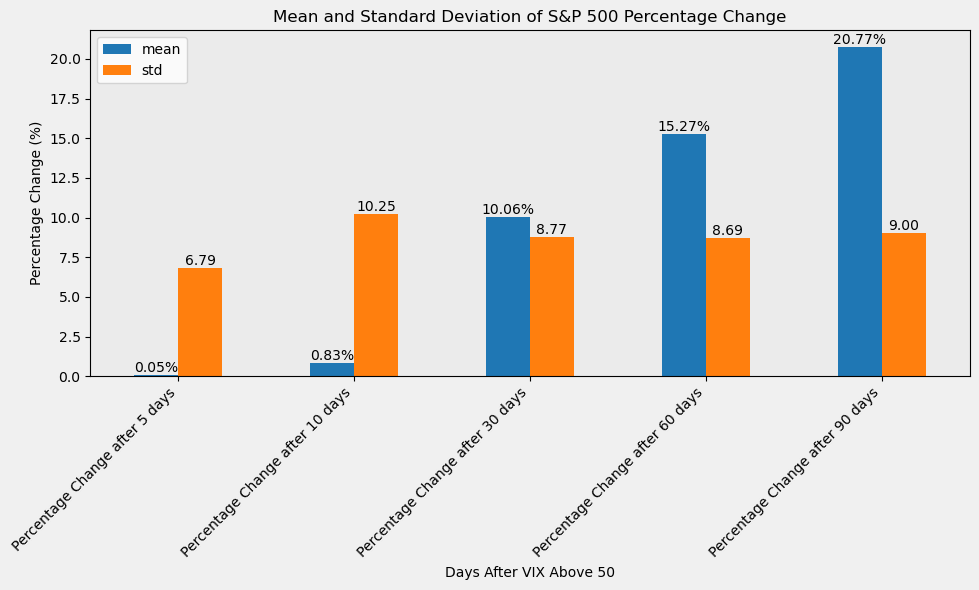

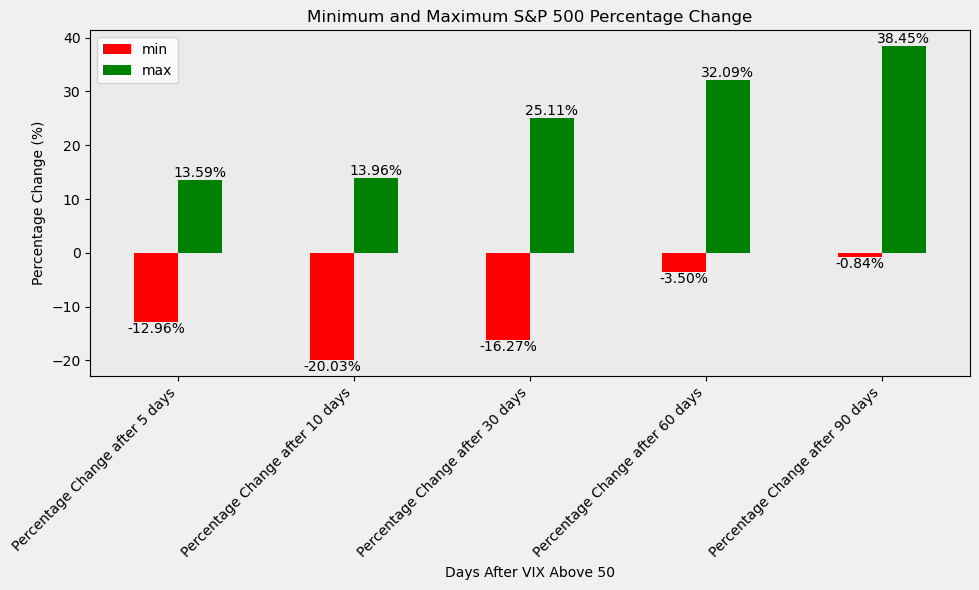

In [17]:
import matplotlib.pyplot as plt

# Calculate descriptive statistics
description = sp500_percentage_change.describe()

# Transpose the DataFrame for plotting
description_T = description.T

# Graph 1: Mean and Standard Deviation
fig1, ax1 = plt.subplots(figsize=(10, 6))

# Set background color for figure and axes
fig1.patch.set_facecolor('0.94') # Light gray
ax1.set_facecolor('0.92') # Light gray


description_T[['mean', 'std']].plot(kind='bar', ax=ax1)

# Add value labels to the bars in Graph 1
for i, container in enumerate(ax1.containers):
    if i == 0:  # Mean values
        ax1.bar_label(container, fmt='%.2f%%')
    else:  # Standard deviation values
        ax1.bar_label(container, fmt='%.2f')


# Set labels and title for Graph 1
ax1.set_xlabel("Days After VIX Above 50")
ax1.set_ylabel("Percentage Change (%)")
ax1.set_title("Mean and Standard Deviation of S&P 500 Percentage Change")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the first chart
plt.tight_layout()
plt.show()

# Graph 2: Min and Max Values
fig2, ax2 = plt.subplots(figsize=(10, 6))

# Set background color for figure and axes
fig2.patch.set_facecolor('0.94') # Light gray
ax2.set_facecolor('0.92') # Light gray

description_T[['min', 'max']].plot(kind='bar', ax=ax2, color=['red', 'green'])

# Add value labels to the bars in Graph 2
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.2f%%')

# Set labels and title for Graph 2
ax2.set_xlabel("Days After VIX Above 50")
ax2.set_ylabel("Percentage Change (%)")
ax2.set_title("Minimum and Maximum S&P 500 Percentage Change")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the second chart
plt.tight_layout()
plt.show()